In [2]:
doc = [
    ("I love this movie", "positive"), ("This movie is great", "positive"), ("The acting is terrible", "negative"),
     ("I don't like this movie", "negative")]
doc

[('I love this movie', 'positive'),
 ('This movie is great', 'positive'),
 ('The acting is terrible', 'negative'),
 ("I don't like this movie", 'negative')]

In [4]:
texts, labels = zip(*doc)
texts

('I love this movie',
 'This movie is great',
 'The acting is terrible',
 "I don't like this movie")

In [5]:
labels

('positive', 'positive', 'negative', 'negative')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(texts)
x

<4x10 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)
y

array([1, 1, 0, 0])

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(x_train, y_train)

MultinomialNB()

In [14]:
cls.score(x_test, y_test)

0.0

In [15]:
y_pred = cls.predict(x_test)
y_pred

array([0])

In [19]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[0, 0],
       [1, 0]])

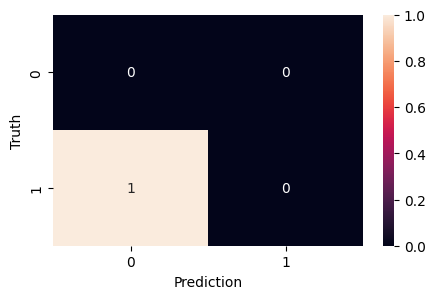

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pt
import seaborn as sn
pt.figure(figsize = (5,3))
sn.heatmap(cm, annot=True)
pt.xlabel('Prediction')
pt.ylabel('Truth')
pt.show()

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.0

In [22]:
#SVM model
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [24]:
clf.score(x_test, y_test)

0.0

In [25]:
y_pred1= clf.predict(x_test)
y_pred1

array([0])

In [26]:
metrics.accuracy_score(y_test, y_pred)

0.0

ONE HOT ENCODING

In [28]:
categories = ['sports', 'politics', 'technology', 'entertainment']
categories

['sports', 'politics', 'technology', 'entertainment']

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe

OneHotEncoder()

In [32]:
x = ohe.fit_transform([[category] for category in categories])
print(x.toarray())

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [44]:
feature_names = ohe.get_feature_names_out(['category'])
y = feature_names
y

array(['category_entertainment', 'category_politics', 'category_sports',
       'category_technology'], dtype=object)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [37]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(x_train, y_train)

MultinomialNB()

In [38]:
cls.score(x_test, y_test)

0.0

In [39]:
y_pred = cls.predict(x_test)
y_pred

array(['category_politics'], dtype='<U19')

In [40]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [0, 0]])

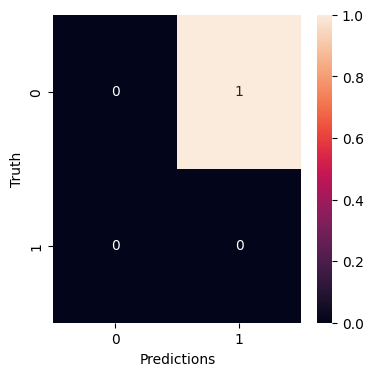

In [42]:
import seaborn as sn
import matplotlib.pyplot as pt
pt.figure(figsize=(4,4))
sn.heatmap(cm,annot=True)
pt.xlabel('Predictions')
pt.ylabel('Truth')
pt.show()

In [43]:
metrics.accuracy_score(y_test, y_pred)

0.0